In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# ML as an API

La mayoría de los profesionales del ML utilizan R/Python para sus experimentos. Pero los consumidores de esos modelos de ML serían ingenieros de software que utilizan una pila tecnológica completamente diferente, como Javascript, .NET, etc. Hay dos formas de resolver este problema:

    - Reescribiendo todo el código en el lenguaje en el que trabaja la gente de ingeniería de software. Lo anterior parece una buena idea, pero el tiempo y la energía necesarios para conseguir replicar esos intrincados modelos sería una auténtica pérdida de tiempo. Además, la mayoría de lenguajes como JavaScript, no tienen grandes librerías para realizar ML. Lo más sensato sería mantenerse alejado de este enfoque.
    
    
    - Enfoque API-first - Las API web han facilitado el buen funcionamiento de las aplicaciones entre lenguajes. Si un desarrollador frontend necesita usar tu modelo ML para crear una aplicación web potenciada por ML, sólo necesitaría obtener la URL Endpoint desde donde se sirve la API y una documentación con los parámetros necesarios, hacer una llamada a tu servicio API y eso es todo ;).


## API

¿Qué es una API? 

*En palabras sencillas, una API es un contrato (hipotético) entre dos programas informáticos que establece que si el programa del usuario proporciona datos en un formato predefinido, el programa del usuario ampliará su funcionalidad y proporcionará el resultado al programa del usuario".

En esencia, las API son muy parecidas a las aplicaciones web, pero en lugar de ofrecer una página HTML con un bonito diseño, las API tienden a devolver (y esperar) datos en un formato estándar de intercambio de datos como JSON, XML, etc. Una vez que el desarrollador obtiene el resultado deseado, puede darle el estilo que desee.

Por ejemplo: 
- https://cloud.google.com/vision/
- https://github.com/GoogleCloudPlatform/cloud-vision/tree/master/python

## Flask

Flask es un framework de desarrollo de servicios web (web API) en Python. 

Flask es el favorito de los desarrolladores de Python por muchas razones. El framework Flask viene con un servidor web ligero incorporado que necesita una configuración mínima, y puede ser controlado desde tu código Python. Esta es una de las razones por las que es tan popular.

**Ejemplo**

Primero importamos Flask.

In [2]:
# Import libraries
from flask import Flask
?Flask

Este código crearía una API Flask ficticia. Sin embargo, Flack puede dar problemas cuando se usa en Jupyter Notebooks. ¡Mejor cambiar a Spyder o similar!

In [2]:
# Initialize API
app = Flask(__name__)

# Define API service
@app.route("/") # API service path
def hello(): # API service functionality
    return "Máster en Data Analytics"

# Run API
if __name__ == '__main__':
    app.run(host = '0.0.0.0', debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

C:\Users\jesus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3426: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Compruebe http://localhost:5000/ después de ejecutar el script.

Flask se ejecuta en el puerto número 5000 por defecto, pero esto puede cambiarse pasando un argumento extra a la llamada *app.run*.

In [4]:
?app.run

In [ ]:
app.run(host = '0.0.0.0', debug=True, port = 8001)

## Load Data

¿Echabas de menos a Iris tanto como yo? 😛

In [3]:
from sklearn.datasets import load_iris as load_data;

In [4]:
# Load data
data = load_data();
X = data.data;
y = data.target;

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Train Model

Vamos a entrenar una Regresión Logística simple.

In [6]:
# 1) Import model
from sklearn.linear_model import LogisticRegression as model_constructor;

In [7]:
# 3) Define model
model = model_constructor(max_iter = 1000, random_state = 0)

# 4) Train the model
model.fit(X, y)

LogisticRegression(max_iter=1000, random_state=0)

## Guardar Modelo

Ha construido su modelo de aprendizaje automático. Ahora va a guardar este modelo. Técnicamente hablando, usted serializará este modelo. En Python, esto se llama **Pickling**.

Vamos a utilizar scikit-learn *joblib* para este propósito.

In [8]:
import joblib
?joblib.dump

In [9]:
joblib.dump(model, 'C:/Users/jesus/Desktop/model.pkl')

['C:/Users/jesus/Desktop/model.pkl']

El modelo de Regresión Logística ya está guardado. Puede cargar este modelo en la memoria con una sola línea de código. Cargar el modelo de nuevo en su espacio de trabajo se conoce como **Deserialización**.

In [10]:
?joblib.load

In [11]:
model_2 = joblib.load('model.pkl')

Veamos si los dos modelos son iguales.

In [12]:
model.predict(X) == model_2.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Integrar modelo en API

Para servir tu modelo con Flask, harás las dos cosas siguientes:

- Cargar el modelo ya persistente en memoria cuando se inicie la aplicación.
    
    
- Crear un punto final de API que tome variables de entrada, las transforme al formato adecuado y devuelva predicciones.

La comunicación entre el usuario y la API se realizará a través del formato **JSON**. JSON son las siglas de JavaScript Object Notation, y es uno de los formatos de intercambio de datos más utilizados. 

El formato Json tiene el siguiente aspecto

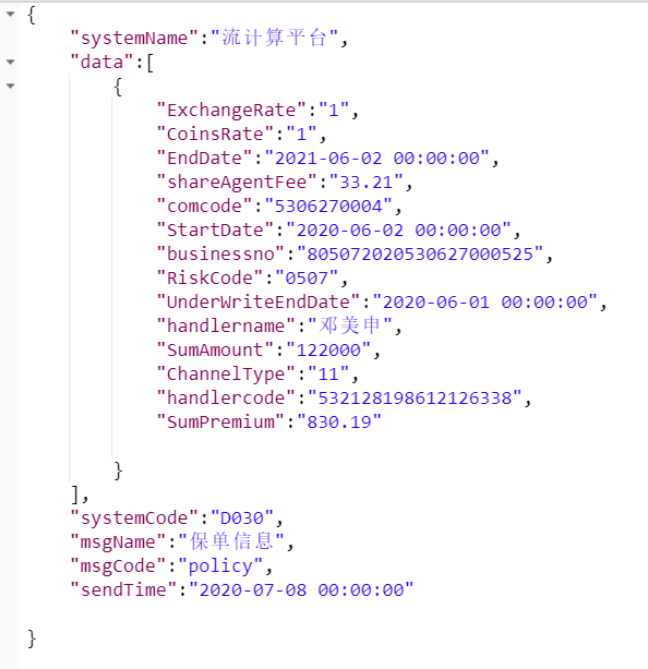

Reference: https://www.w3schools.com/js/js_json_intro.asp

Creemos ahora nuestra API.

In [ ]:
# Import libraries
from flask import Flask, jsonify

In [ ]:
# Set port
port = 8001

# Initialize API
app = Flask(__name__)

# Define API service
@app.route('/predict', methods=['POST']) # API service path and method to call it
def predict(): # API service functionality
    json_ = request.json
    dat = pd.DataFrame(json_)
    prediction = lr.predict(query)
    return jsonify({'prediction': list(prediction)})

# Run API
if __name__ == '__main__':
    app.run(host = '0.0.0.0', port=port, debug=True)

## Testear API en Postman

Para probar tu API, necesitarás algún tipo de cliente API. Postman es sin duda uno de los mejores que existen. 

Puedes descargar Postman aquí: https://www.postman.com/download

Después de haber iniciado el servidor Flask con éxito, es necesario introducir la URL correcta con el número de puerto correcto en Postman. Debería ser similar a la siguiente: